In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(ggplot2))

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”


In [2]:
df <- readRDS("../Data/full_hourly_chunks.rds")

In [3]:
df <- df %>% mutate(starttime = as.POSIXct(starttime, format="%Y-%m-%d %H:%M:%S",tz="GMT"))
names(df)[names(df) == "Freq"] <- "texts"
names(df)[names(df) == "starttime"] <- "chunk"

In [4]:
between <- function(df, startdate, enddate) {
  data <- dplyr::filter(df,chunk >= startdate & chunk < enddate)
  return(data)
}
summarystats <- cbind(
  summary(df$texts),
  summary(between(df,"2018-07-01","2018-10-01")$texts),
  summary(between(df,"2018-10-01","2019-01-01")$texts),
  summary(between(df,"2019-01-01","2019-04-01")$texts),
  summary(between(df,"2019-04-01","2019-07-01")$texts),
  summary(between(df,"2019-07-01","2019-10-01")$texts),
  summary(between(df,"2019-10-01","2020-01-01")$texts),
  summary(between(df,"2020-01-01","2020-04-01")$texts),
  summary(between(df,"2020-04-01","2020-07-01")$texts),
  summary(dplyr::filter(df,chunk >= "2020-07-01" & chunk < "2020-10-01")$texts),
  summary(dplyr::filter(df,chunk >= "2020-10-01" & chunk < "2021-01-01")$texts),
  summary(dplyr::filter(df,chunk >= "2021-01-01" & chunk < "2021-04-01")$texts),
  summary(dplyr::filter(df,chunk >= "2021-04-01" & chunk < "2021-07-01")$texts),
  summary(dplyr::filter(df,chunk >= "2021-07-01" & chunk < "2021-10-01")$texts),
  summary(dplyr::filter(df,chunk >= "2021-10-01" & chunk < "2022-01-01")$texts),
  summary(dplyr::filter(df,chunk >= "2022-01-01" & chunk < "2022-04-01")$texts),
  summary(dplyr::filter(df,chunk >= "2022-04-01" & chunk < "2022-07-01")$texts))
#colnames(summarystats)<- c("Total","Q2 2020","Q3 2020","Q4 2020","Q1 2021","Q2 2021 (so far)")
colnames(summarystats)<- c("Total","Q3 2018","Q4 2018","Q1 2019","Q2 2019","Q3 2019","Q4 2019","Q1 2020","Q2 2020","Q3 2020","Q4 2020","Q1 2021","Q2 2021","Q3 2021", "Q4 2021","Q1 2022","Q2 2022")
summarytable <- as.data.frame(t(round(summarystats,2)))
colnames(summarytable) <- c("Min","Q1","Median","Mean","Q3","Max")

In [5]:
summarytable

,Min,Q1,Median,Mean,Q3,Max
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total,0,15,32.0,42.68,57.00,718
Q3 2018,NA,NA,NA,NaN,NA,NA
Q4 2018,0,3,7.0,9.57,14.00,61
Q1 2019,0,5,11.0,12.81,18.25,58
Q2 2019,0,6,12.0,15.03,21.00,68
Q3 2019,0,8,16.0,19.15,27.00,85
Q4 2019,0,15,25.0,28.91,40.00,95
Q1 2020,0,18,30.0,34.77,48.00,169
Q2 2020,1,20,36.0,37.94,51.00,179


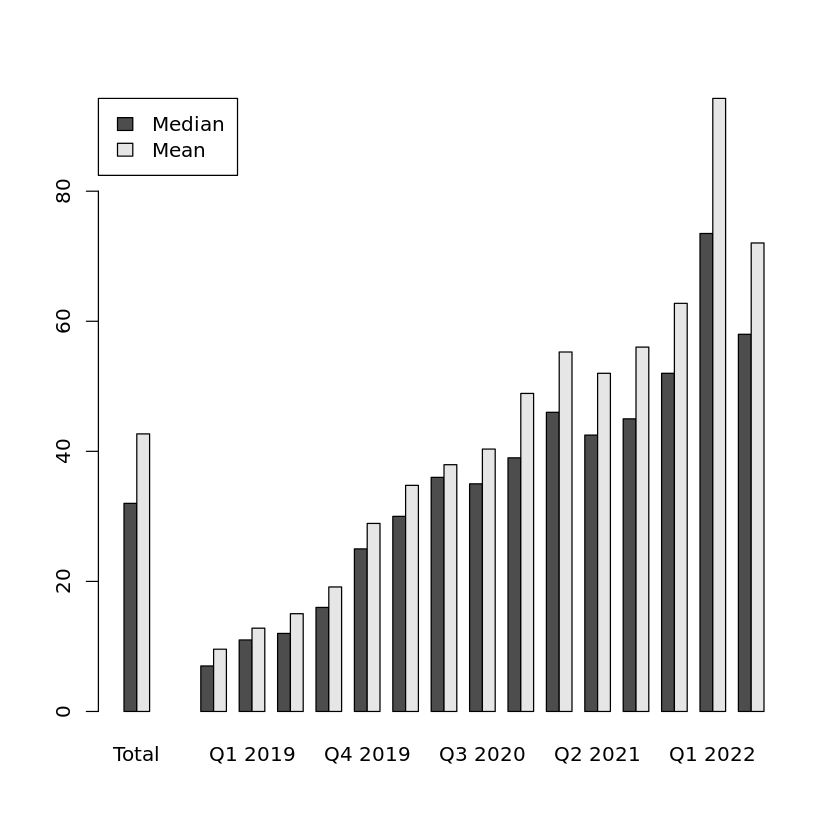

In [6]:
summarytable <- mutate(summarytable, IQR = Q3-Q1)
barplot(summarystats[3:4,],beside = T,legend=T,args.legend=list("x"="topleft"))
summarytable$rownames <- c("Total","Q3 2018","Q4 2018","Q1 2019","Q2 2019","Q3 2019","Q4 2019","Q1 2020","Q2 2020","Q3 2020","Q4 2020","Q1 2021","Q2 2021","Q3 2021", "Q4 2021","Q1 2022","Q2 2022")

Warning message:
“Removed 2 rows containing missing values (geom_col).”
Warning message:
“Removed 2 rows containing missing values (geom_col).”


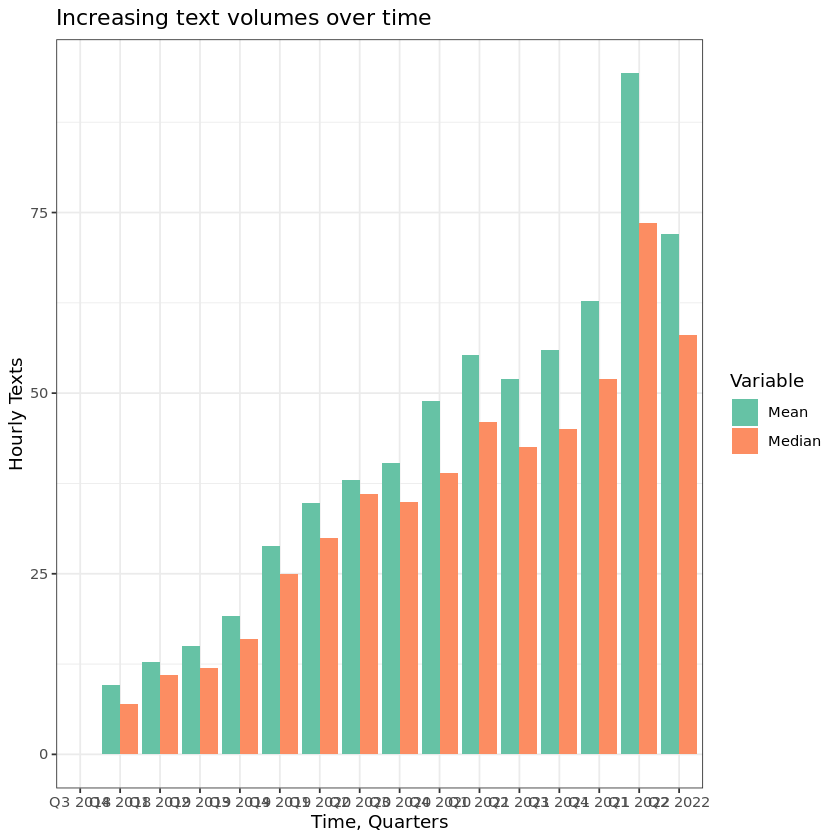

In [10]:
tidy <- summarytable %>% dplyr::filter(rownames != "Total") %>% dplyr::select('rownames','Mean','Median') %>% 
  reshape2::melt(id.vars='rownames', variable.name='Variable', value.name='value')
tidy1 <- tidy %>% dplyr::filter(Variable=='Mean') %>%
  mutate(rownames=factor(rownames, levels=rownames))
tidy2 <- tidy %>% dplyr::filter(Variable=='Median') %>%
  mutate(rownames=factor(rownames, levels=rownames))
tidy <- rbind(tidy1, tidy2)
ggplot(tidy, aes(x=rownames,y=value, fill=Variable)) + scale_fill_brewer(palette="Set2") +
  geom_col(position = "dodge") + theme_bw() +
  xlab('Time, Quarters') + ylab('Hourly Texts') + ggtitle("Increasing text volumes over time")

ggsave("../Plots/Quarterly_mean_increase.pdf", height = 4, width = 10) 

In [7]:
n_rows <- dim(df)[1]
ci <- function(vector) {
  return(1.96*sd(vector)/sqrt(n_rows))
}
chocolate <- df %>% mutate(year = floor_date(chunk, 'year')) %>% 
  as.data.frame %>% group_by(year) %>%
  summarise(texts_mean = mean(texts),
            texts_ci = ci(texts)
            )
chocolate

year,texts_mean,texts_ci
<dttm>,<dbl>,<dbl>
2018-01-01,9.574521,0.09402345
2019-01-01,19.019863,0.16502320
2020-01-01,40.513092,0.32427910
2021-01-01,56.534018,0.40438582
2022-01-01,84.791556,0.70324870


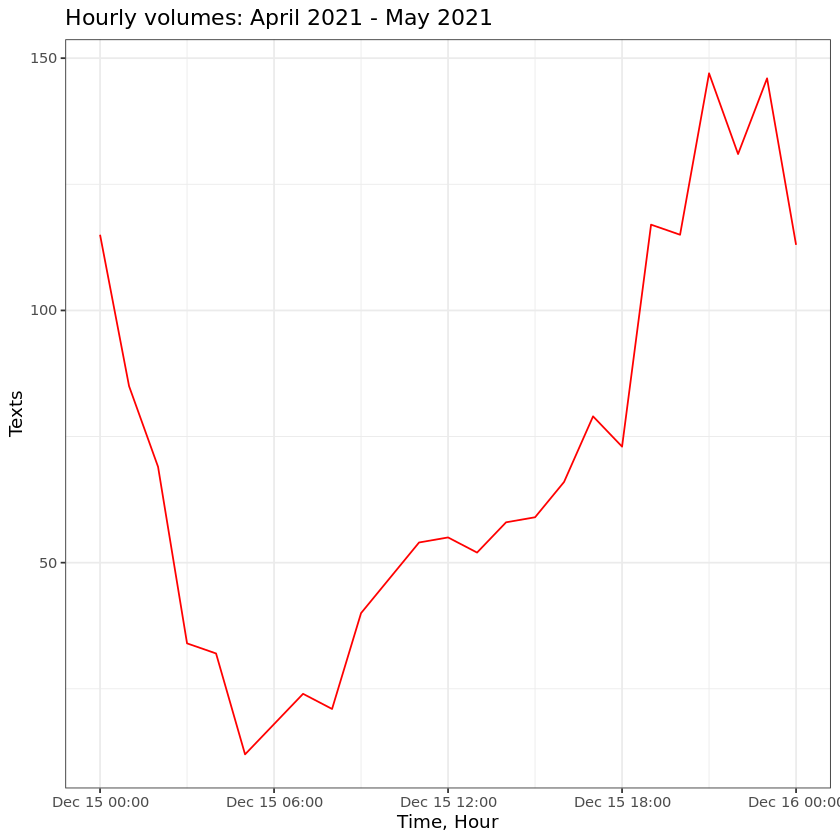

In [15]:
df$hour <- lubridate::floor_date(df$chunk, "hours")
hour <- df %>% as.data.frame() %>% group_by(hour) %>% summarise(texts = sum(texts))
ggplot(dplyr::filter(hour, hour >= "2021-12-15" & hour <= "2021-12-16"),aes(hour,texts)) + geom_line(col="red") +
  theme_bw() + ggtitle("Hourly volumes: April 2021 - May 2021") + xlab("Time, Hour") +ylab("Texts")